# Lab 1 : Applied Time series 

---

In [1]:
import polars as pl 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import scipy.io
from datetime import date
from datetime import timedelta

---
## Exercise 1 


Text(0.5, 1.0, 'White Noise')

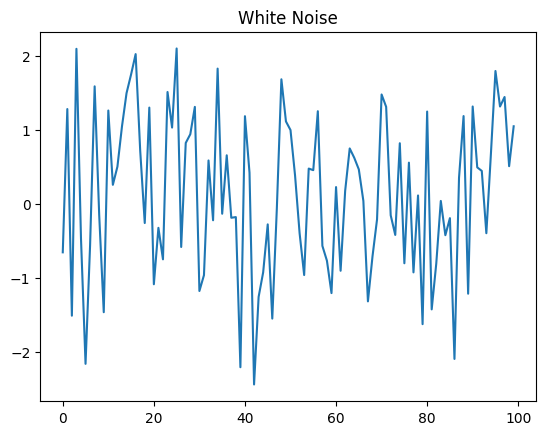

In [2]:
white_noises = np.random.normal(0,1,size=(100, 1000))
sns.lineplot(white_noises[:,0]).set_title("White Noise")

### Autocorrelation plots

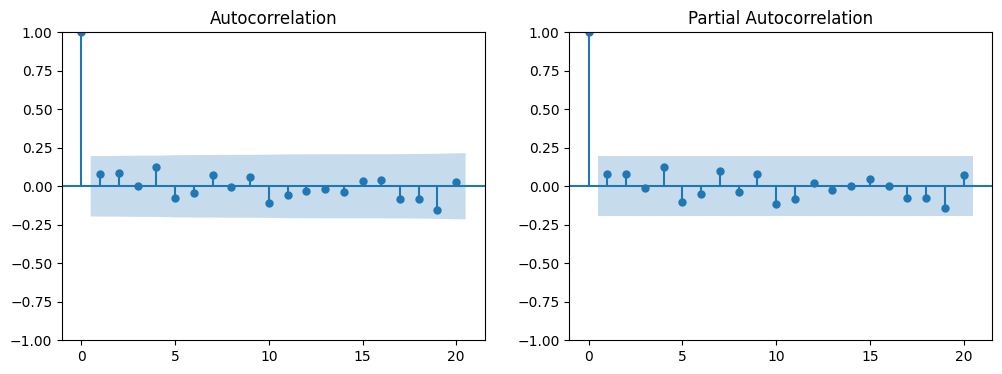

In [3]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

fig = sm.graphics.tsa.plot_acf(white_noises[:,0], ax=ax1)
fig = sm.graphics.tsa.plot_pacf(white_noises[:,0], ax=ax2)

### Ljung Box test

In [4]:
lb_test = sm.tsa.stattools.q_stat(
    sm.tsa.stattools.acf(x = white_noises[:,0], nlags=20)[1:],
    100
)

In [5]:
print(f"""
Q-Stats for the Ljung Box test : 
{
    lb_test[0]
}
P-Values for the Ljung-Box test :
{
    lb_test[1]
}
    """)


Q-Stats for the Ljung Box test : 
[ 0.68187339  1.39912073  1.40084375  3.12386134  3.78470155  4.00887317
  4.58143593  4.58813267  5.00030272  6.34126405  6.70774692  6.81028009
  6.85347377  7.00938679  7.13029949  7.34243183  8.16095363  8.97351969
 11.9666159  12.07048917]
P-Values for the Ljung-Box test :
[0.40894237 0.49680367 0.70533696 0.53731566 0.58081109 0.67547556
 0.71089012 0.80055232 0.83428187 0.78582329 0.82223291 0.86989208
 0.9095438  0.93434944 0.9539326  0.96608255 0.96298291 0.96035294
 0.88704734 0.91362842]
    


<Axes: ylabel='Count'>

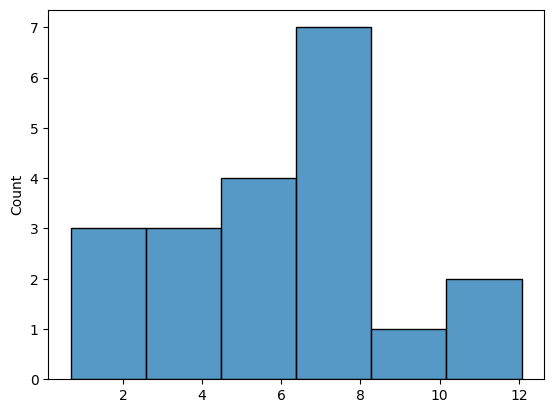

In [6]:
sns.histplot(lb_test[0])

In [7]:
f"Rejection percentage : {np.mean(lb_test[1]<0.05)*100} %"

'Rejection percentage : 0.0 %'

In [8]:
arma = sm.tsa.arima.ARIMA(white_noises[:,0], trend="n", order=(1,0,1)).fit()
arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -149.189
Date:                Thu, 17 Oct 2024   AIC                            304.377
Time:                        11:28:42   BIC                            312.193
Sample:                             0   HQIC                           307.540
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7109      0.484      1.468      0.142      -0.238       1.660
ma.L1         -0.6166      0.540     -1.143      0.253      -1.674       0.441
sigma2         1.1567      0.210      5.499      0.000       0.744       1.569
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 2.85
Prob(Q):                              0.84   Prob(JB):                         0.24
Heteroskedasticity (H):               0.70   Skew:                            -0.22
Prob(H) (two-sided):                  0.30   Kurtosis:                         2.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
indpro = pl.read_csv(r"C:\Users\faune\timeseriescourse\indpro.csv")

In [10]:
indpro.select("indpro").to_series().to_numpy()

array([  4.4493,   4.3591,   4.2389, ..., 112.1594, 113.1081, 113.5293])

In [11]:
arma = (
    sm.tsa.arima.ARIMA(
        indpro.select("indpro").to_series().to_numpy(),
        trend="n", 
        order=(1,0,1)
    )
    .fit()
)
arma.summary()

c:\Users\faune\miniconda3\envs\timeseriescourse\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1027
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -439.474
Date:                Thu, 17 Oct 2024   AIC                            884.947
Time:                        11:28:43   BIC                            899.750
Sample:                             0   HQIC                           890.566
                               - 1027                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   3.52e-05   2.84e+04      0.000       1.000       1.000
ma.L1          0.2882      0.021     13.920      0.000       0.248       0.329
sigma2         0.1363      0.004     36.458      0.000       0.129       0.144
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):               557.00
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               4.18   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

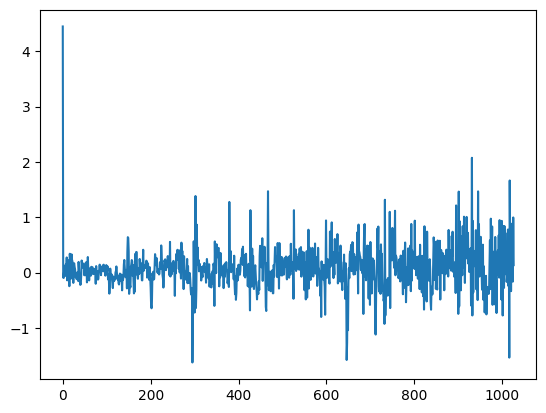

In [12]:
sns.lineplot(arma.resid)

In [13]:
data = scipy.io.loadmat(r"C:\Users\faune\timeseriescourse\session2data.mat")
starting_date = date(2024,10,3)

In [14]:
processes = (
    pl.DataFrame(
        data={
            "process1":data['process1'],
            "process2":data['process2'], 
            "process3":data['process3'], 
            "process4":data['process4'], 
            "process5":data['process5']
        }
    )
    .explode(columns="*")
    .with_columns(
        date = pl.date_range(starting_date, starting_date + timedelta(499))
    )
)

In [15]:
processes

process1,process2,process3,process4,process5,date
f64,f64,f64,f64,f64,date
2.433464,-0.819578,-0.002388,-1.661974,0.637437,2024-10-03
4.012568,-0.590912,-0.000834,-1.234164,0.760621,2024-10-04
3.020284,-0.375688,-0.004454,-2.102771,1.178766,2024-10-05
2.47869,-0.48586,-0.059,-1.569714,-0.189693,2024-10-06
-0.58276,-1.07317,-0.072006,-1.119642,1.363901,2024-10-07
…,…,…,…,…,…
2.149984,-0.533958,19.369495,0.28037,12.077997,2026-02-10
2.679238,-1.552372,19.322461,1.070465,10.182587,2026-02-11
0.096229,-1.397599,19.427425,1.84164,9.240642,2026-02-12


<Axes: xlabel='date'>

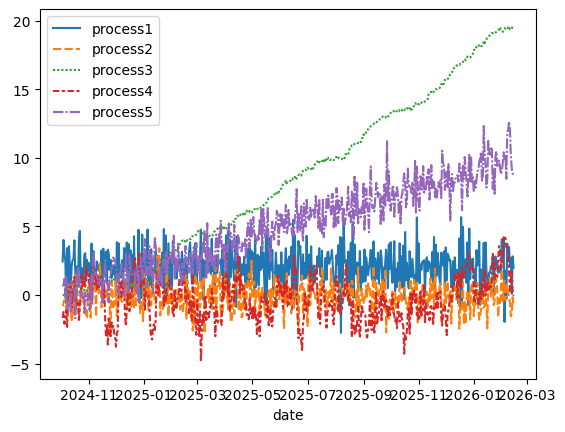

In [18]:
sns.lineplot(processes.to_pandas().set_index('date'))

In [19]:
def identify_arma_orders(data = pl.Series) -> None:
    fig = plt.figure(figsize=(12,4))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)

    fig = sm.graphics.tsa.plot_acf(data, ax=ax1)
    fig = sm.graphics.tsa.plot_pacf(data, ax=ax2)
    
    return

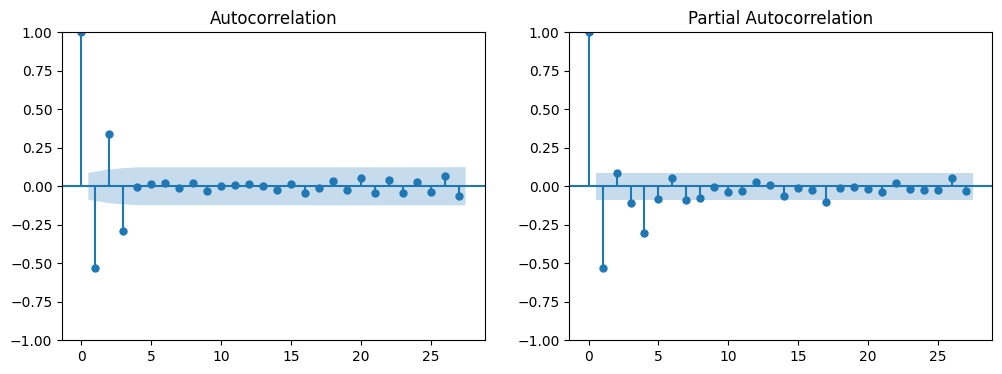

In [20]:
identify_arma_orders(data=processes.select('process1'))